In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))

import datetime
from src.pair_scanner import analyze_ticker_pairs


In [2]:
tickers = ["PFF", "PGF", "PGX"]  # example
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=5 * 365)


In [3]:
results = analyze_ticker_pairs(tickers, start_date, end_date)
len(results["pair_signals"])


2

In [4]:
top_pair = results["pair_signals"][0]
top_pair


{'message': 'PFF & PGF pair reached Max level.\nRisk = 0.65, Reward = 3.70\nCorrelation: 0.92\nZ-Score: 1.51\nMean-Reversion Prob.: 49.6%\nTotal Score: 4.85\n\n',
 'total_score': 4.846870192589883,
 'ticker1': 'PFF',
 'ticker2': 'PGF',
 'signal_type': 'Max level',
 'correlation': 0.9234350962949411,
 'z_score': 1.511907102879952,
 'mean_reversion_prob': 0.4960309657066827,
 'risk': 0.6455268859863281,
 'reward': 3.7020263671875,
 'spread':                  Open       High        Low      Close
 Date                                                  
 2020-11-22  13.648031  13.648031  13.648031  13.648031
 2020-11-29  13.852479  13.852479  13.852479  13.852479
 2020-12-06  13.948600  13.948600  13.948600  13.948600
 2020-12-13  13.940641  13.940641  13.940641  13.940641
 2020-12-20  14.105681  14.105681  14.105681  14.105681
 ...               ...        ...        ...        ...
 2025-10-26  16.876642  16.876642  16.876642  16.876642
 2025-11-02  16.578998  16.578998  16.578998  16.5789

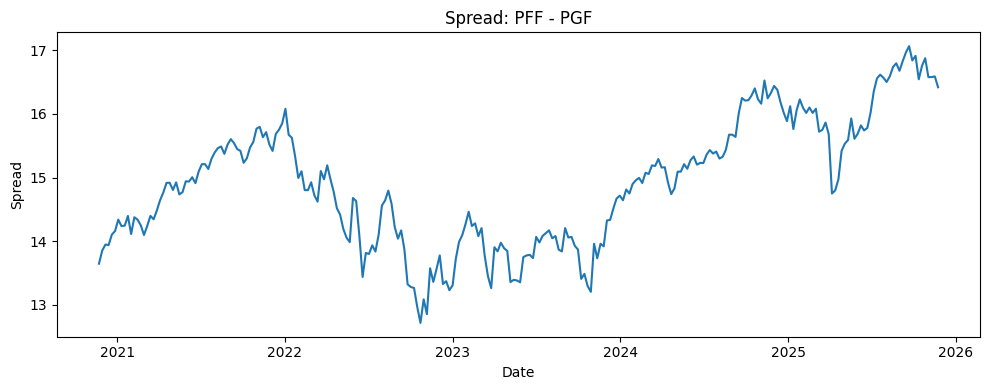

In [5]:
import matplotlib.pyplot as plt

spread_df = top_pair["spread"]

plt.figure(figsize=(10, 4))
plt.plot(spread_df.index, spread_df["Close"])
plt.title(f"Spread: {top_pair['ticker1']} - {top_pair['ticker2']}")
plt.xlabel("Date")
plt.ylabel("Spread")
plt.tight_layout()
plt.show()


In [6]:
import matplotlib.pyplot as plt
import os

top_pair = results["pair_signals"][0]
spread_df = top_pair["spread"]

plt.figure(figsize=(10, 4))
plt.plot(spread_df.index, spread_df["Close"])
plt.title(f"Spread: {top_pair['ticker1']} - {top_pair['ticker2']}")
plt.xlabel("Date")
plt.ylabel("Spread")
plt.tight_layout()

# Make sure the plots/ directory exists
os.makedirs("../plots", exist_ok=True)

output_path = "../plots/example_spread.png"
plt.savefig(output_path, dpi=200)
plt.close()

output_path


'../plots/example_spread.png'

In [7]:
import os

# Take the spread series from the same top pair
spread_df = top_pair["spread"].copy()
spread_df = spread_df.reset_index()
spread_df.rename(columns={"index": "Date"}, inplace=True)

# Keep it small – e.g. last 100 rows
sample = spread_df.tail(100)

os.makedirs("../data", exist_ok=True)
data_path = "../data/example_data.csv"
sample.to_csv(data_path, index=False)

data_path


'../data/example_data.csv'